In [416]:
#%% Load Modules
startup_file='init_python.py'
exec(open(startup_file).read())

In [417]:
# parameters 

#number of ensembles
N_ensemble=10

#define the start/end files for plotting
file_start = 1
file_end = 250

#time between files (0.5 factor due to change in equation)
dt = 0.5*1.e-3

#forcing scale
kf = 512
wf = kf**2.0
L = 2.0*np.pi
N = 2048

#fluxes defined from initial forcing
wave_action_flux = 2.0 * 32.12
energy_flux = 2.0 * 8.41969e6

#fit regions for T/mu
kmin_low=1
kmax_low = 5

#fit regions for T/\omega
kmin_high=200
kmax_high=400

#if true then fit spectum by max. Default is average across modes
normalise = True
simon_fitting = False

In [418]:
def Gibbs_function(x,a):
    return 1.0/( (x/a) + 1.0)

In [419]:
n_k = np.zeros(N)

temp = np.zeros(file_end-file_start+1)
mu =  np.zeros(file_end-file_start+1)
time = np.zeros(file_end-file_start+1)


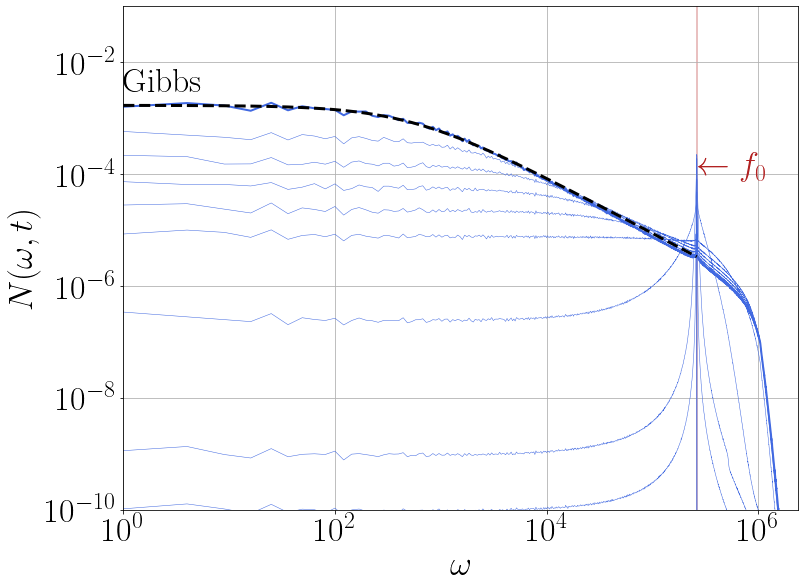

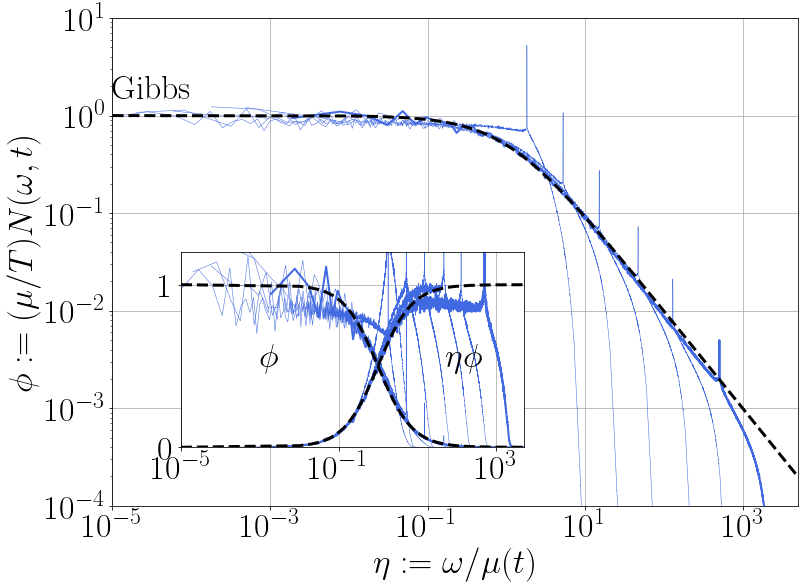

In [420]:
fig1, axs1 = newfig(1, 1)
fig2, axs2 = newfig(1, 1)
axsz = axs2.inset_axes([0.1,0.12,0.5,0.4])#axs2,width="50%", height="45%", loc='lower left',borderpad=3)
index = 0
for file_num in range(file_start,file_end+1,25):

	file_time = file_num * dt
	n_k = 0.0
	#average over ensembles
	for ensemble_num in range(0,N_ensemble,1):
		filename = '/data2/2d_gp_selfsimilar/ensemble_%.1d/output/spectrum.%.5d' % (ensemble_num,file_num);
		data = np.loadtxt(filename)
		n_k += data[:,1]
        
	
	n_k /= N_ensemble   # this is the 2d spectrum  
	k = data[:,0]

	n_omega = n_k[1:]/(2.0*k[1:]) 	# n_2d/2k = 1d sepctrum in freq space
	omega = k[1:]**2				# omega = k**2


	if file_num == file_start:
		total_wave_action = np.sum(n_k)
		total_energy = 0.5 * np.sum(k * k * n_k)

	if normalise:
		if simon_fitting:
			maxN= np.max(n_omega[0:(kf//2)])
			maxN_index = np.argmax(n_omega[0:(kf//2)])
			n_omega /= maxN
			omega_fit = omega[0:kf//2]
			n_fit = n_omega[0:kf//2]

			opt, pcov = curve_fit(Gibbs_function, omega_fit, n_fit)

			time[index] = file_num*dt
			temp[index] = opt * maxN
			mu[index] = opt
		
			index=index+1
		else:
			maxN= np.mean(n_omega[kmin_low:kmax_low])
			#n_omega /= maxN
			omega_fit = omega[0:kf//2]
			n_fit = n_omega[0:kf//2]/maxN

			opt, pcov = curve_fit(Gibbs_function, omega_fit, n_fit)

			time[index] = file_num*dt
			temp[index] = opt * maxN
			mu[index] = opt
		
			index=index+1

	
	
	axs1.plot(omega, n_omega, linewidth=0.5,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))
	axs2.plot(omega/opt, n_omega/(maxN), linewidth=0.5,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))
	axsz.plot(omega/opt, n_omega/(maxN), linewidth=0.5,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))
	axsz.plot(omega/opt, (omega/opt)*n_omega/(maxN), linewidth=0.5,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))

#l2, = axs1.plot(omega[2:300], omega[2:300]/omega[2:300],linewidth=3,label=r'$\propto \omega^{0}$', color='black', linestyle='-.')
#l3, = axs1.plot(omega[10:450], omega[10:450]**-1.0,linewidth=3,label=r'$\propto \omega^{-1}$', color='black', linestyle=':')
axs1.plot(omega, n_omega, linewidth=2,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))
axs2.plot(omega/opt, n_omega/(maxN), linewidth=2,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))
axsz.plot(omega/opt, n_omega/(maxN), linewidth=2,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))
axsz.plot(omega/opt, (omega/opt)*n_omega/(maxN), linewidth=2,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))



Gibbs = maxN*opt*1.0 / ((omega) +opt)
axs1.plot(omega[:kf], Gibbs[:kf],linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')

axs1.axvspan((kf-2)**2,(kf+2)**2,color='firebrick',alpha=0.2)
axs1.annotate(text='Gibbs',xy=(1,3e-3),c='k')
axs1.annotate(text='$\leftarrow f_0$',xy=(wf,1e-4),c='firebrick')
axs1.grid()
axs1.set_xlabel(r'$\omega$')
axs1.set_ylabel(r'$N(\omega,t)$')
axs1.set_yscale('log')
axs1.set_xscale('log')
axs1.set_xlim(1,(1024*1.5)**2)
axs1.set_ylim(1.e-10,1.e-1)
#axs1.legend(loc='best', ncol=2)

fig1.tight_layout()

fig1.savefig('spectrum_forced.pdf')

eta = np.arange(1.e-5,1.e5,0.01)
Gibbs_fit = 1.0 / (eta+1.0)
axs2.plot(eta, Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')
axsz.plot(eta, Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')
axsz.plot(eta, eta*Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')

axsz.set_yscale('linear')
axsz.set_xscale('log')
axsz.set_xlim(1e-5,5e3)
axsz.set_ylim(0,1.2)
axsz.annotate(text=r'$\phi$',xy=(1.e-3,0.5),c='k')
axsz.annotate(text=r'$\eta\phi$',xy=(5.e1,0.5),c='k')
axsz.grid()

axs2.annotate(text='Gibbs',xy=(1.e-5,1.5e0),c='k')
axs2.annotate(text='$\leftarrow f_0$',xy=(wf,1e-4),c='firebrick')
axs2.grid()
axs2.set_xlabel(r'$\eta:=\omega/\mu(t)$')
axs2.set_ylabel(r'$\phi:=(\mu/T)N(\omega,t)$')
axs2.set_yscale('log')
axs2.set_xscale('log')
axs2.set_xlim(1e-5,5e3)
axs2.set_ylim(1.e-4,1.e1)
#axs1.legend(loc='best', ncol=2)

fig2.tight_layout()

fig2.savefig('gibbs_forced.pdf')


